In [ ]:
import numpy as np
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import pairwise_distances

train_features = np.load('train_features.npy') 
train_labels = np.load('train_labels.npy')    

H, W = 7, 7  
C = 2048     
N = H * W    

node_embedding_matrix = train_features.reshape(-1, N, C) 

def adaptive_knn(node_embeddings, min_k=5, max_k=10, threshold=0.5):
    adjacency_matrices = []
    
    for i in range(node_embeddings.shape[0]):
        distances = pairwise_distances(node_embeddings[i])
        
        local_densities = np.sum(distances < threshold, axis=1)
        
        k_values = np.clip(local_densities, min_k, max_k).astype(int)
        
        adjacency_matrix = np.zeros((N, N))
        
        for j in range(N):
            k = k_values[j]
            neighbors = np.argsort(distances[j])[:k]  
            adjacency_matrix[j, neighbors] = 1
        
        np.fill_diagonal(adjacency_matrix, 1)  
        
        adjacency_matrices.append(adjacency_matrix)
    
    return np.array(adjacency_matrices)

train_adjacency_matrices = adaptive_knn(node_embedding_matrix)

train_graphs = train_adjacency_matrices 
train_labels = train_labels



In [ ]:
test_features = np.load('test_features.npy') 
test_labels = np.load('test_labels.npy')      

test_node_embedding_matrix = test_features.reshape(-1, N, C)  

test_adjacency_matrices = adaptive_knn(test_node_embedding_matrix)

test_graphs = test_adjacency_matrices  
test_labels = test_labels

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def visualize_adjacency_matrix(adjacency_matrix):
    plt.figure(figsize=(6, 4)) 
    plt.title('Adjacency Matrix', fontsize=16)
 
    plt.imshow(adjacency_matrix, cmap='Blues', aspect='auto')  

    num_ticks = min(10, adjacency_matrix.shape[0]) 
    plt.xticks(np.linspace(0, adjacency_matrix.shape[0] - 1, num_ticks, dtype=int), fontsize=10)
    plt.yticks(np.linspace(0, adjacency_matrix.shape[1] - 1, num_ticks, dtype=int), fontsize=10)
    
    cbar = plt.colorbar()
    cbar.set_label('Connection Strength', rotation=270, labelpad=15, fontsize=12)
    
    plt.grid(False)
    plt.show()

In [9]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def visualize_graph(adjacency_matrix, compactness=0.5, scale=1.0):
    G = nx.Graph()
    
    for i in range(adjacency_matrix.shape[0]):
        for j in range(i + 1, adjacency_matrix.shape[1]):
            if adjacency_matrix[i, j] == 1:  
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G, seed=42, k=compactness, scale=scale)  
    
    node_color_map = [nx.degree_centrality(G)[node] for node in G.nodes]
    
    node_sizes = [100 * nx.degree(G)[node] for node in G.nodes]
    
    edge_colors = 'gray'
    edge_widths = [2 for _ in G.edges] 

    plt.figure(figsize=(7, 5))

    nx.draw(
        G, pos, 
        node_color=node_color_map, cmap=plt.cm.plasma, 
        with_labels=True, node_size=node_sizes,      
        font_size=10, font_color='black',         
        edge_color=edge_colors, width=edge_widths, 
        edge_cmap=plt.cm.Blues, alpha=0.7,       
    )
    
    plt.title('k-NN Graph Visualization', fontsize=16)
    plt.show()



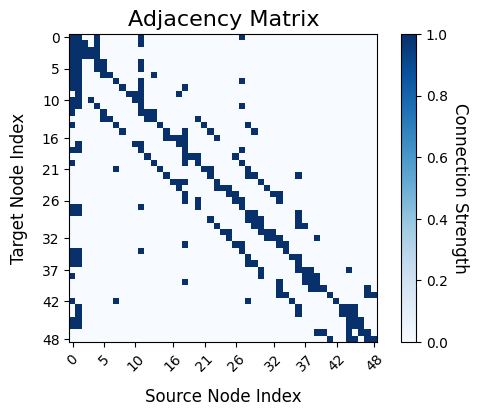

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_adjacency_matrix(adjacency_matrix):
    plt.figure(figsize=(6, 4)) 
    plt.title('Adjacency Matrix', fontsize=16)

    # Display adjacency matrix with improved aspect ratio
    plt.imshow(adjacency_matrix, cmap='Blues', aspect='equal')  

    # Set proper tick positions with labels
    num_ticks = min(10, adjacency_matrix.shape[0])  # Limit number of ticks for readability
    tick_positions = np.linspace(0, adjacency_matrix.shape[0] - 1, num_ticks, dtype=int)

    plt.xticks(tick_positions, labels=[f'{i}' for i in tick_positions], fontsize=10, rotation=45)
    plt.yticks(tick_positions, labels=[f'{i}' for i in tick_positions], fontsize=10)

    # Add color bar with adjusted settings
    cbar = plt.colorbar()
    cbar.set_label('Connection Strength', rotation=270, labelpad=15, fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    # Proper axis labeling with padding to avoid overlapping
    plt.xlabel('Source Node Index', fontsize=12, labelpad=10)
    plt.ylabel('Target Node Index', fontsize=12, labelpad=10)

    # Adjust axis limits to prevent cutoff issues
    plt.xlim(-0.5, adjacency_matrix.shape[1] - 0.5)
    plt.ylim(adjacency_matrix.shape[0] - 0.5, -0.5)  # Reverse y-axis for standard adjacency matrix visuals

    plt.grid(False)
    plt.show()

# Load your adjacency matrix
adjacency_matrix = np.load('ADJ/test_adjacency_matrix_2.npy')

# Visualize with the improved function
visualize_adjacency_matrix(adjacency_matrix)


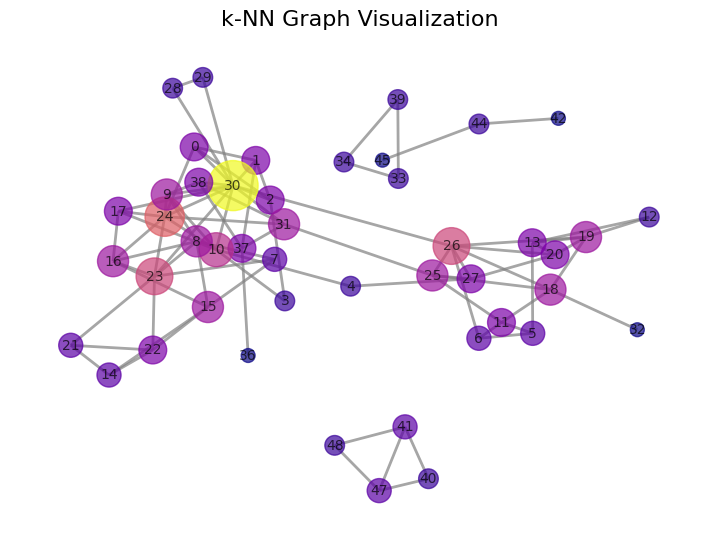

In [28]:
visualize_graph(train_adjacency_matrices[7])